# Business Problem

1. **Objective**
   - To classifiy an image into 3 categories: Driving License, Social Security Card, Other
   - Learn from images and its properties to classify into the respective categories better


2. **Machine Learning Problem**
   - Develop a machine learning model based on convolution neural network to learn properties of the 3 categories of images and predict accurately for new image


3. **Technology**
   - Python, Scikit-learn, tensorflow, keras, Numpy
   

4. **Decision making**
   - Select the best model which performs the best w.r.t classification accuracy
   - Metrics: Accuracy
   

5. **Deployment**
   - Deploy model in a scalable way so that business decisions can be taken in near real time to classify images



**Dataset**<br>
driving_license images<br>
social_security images<br>
other images<br>

In [ ]:
# !pip install numpy==1.21.5
# !pip install keras==2.7.0
# !pip install tensorflow==2.7.0
# !pip install matplotlib==3.5.1

In [5]:
pip install tensorflow

  Using cached tensorflow-2.18.0-cp312-cp312-win_amd64.whl.metadata (3.3 kB)
  Using cached tensorflow_intel-2.18.0-cp312-cp312-win_amd64.whl.metadata (4.9 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.1.24-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.70.0-cp312-cp312-win_amd64.whl.metadata (4.0 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached ml_dtypes-0.4.1-cp312-cp312-win_amd64.whl.metadata (20 kB)
  Using 

In [6]:
import numpy as np
import pathlib #helps to load bunch of images from a path
from tensorflow import keras
from tensorflow.keras import layers
import PIL # helps to do image processing things
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [7]:
data_dir = pathlib.Path("input/Training_data/")

In [8]:
image_count = len(list(data_dir.glob('*/*')))
print(image_count)

600


In [9]:
driving_license = list(data_dir.glob('driving_license/*'))
social_security = list(data_dir.glob('social_security/*'))
others = list(data_dir.glob('others/*'))

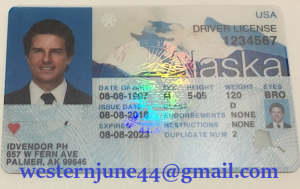

In [10]:
PIL.Image.open(str(driving_license[2]))

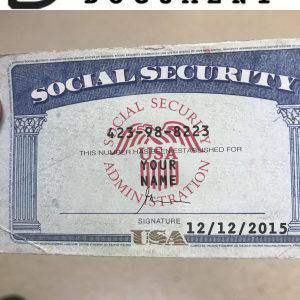

In [11]:
PIL.Image.open(str(social_security[10]))

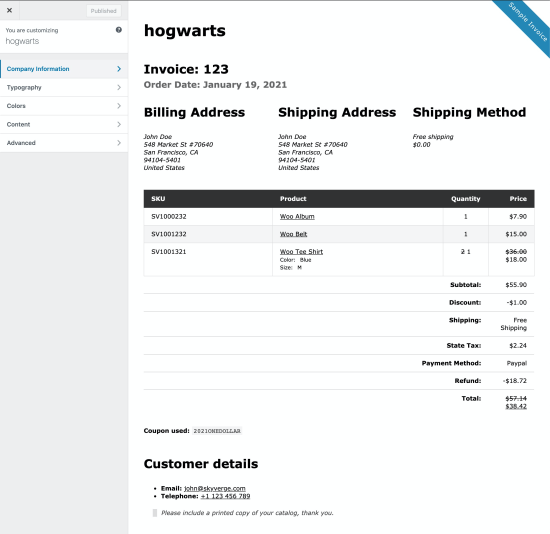

In [12]:
PIL.Image.open(str(others[140]))

In [13]:
batch_size = 32 #32 image batches
img_height = 180
img_width = 180

In [14]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 600 files belonging to 3 classes.
Using 480 files for training.


In [15]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 600 files belonging to 3 classes.
Using 120 files for validation.


In [16]:
class_names = train_ds.class_names
print(class_names)

['driving_license', 'others', 'social_security']


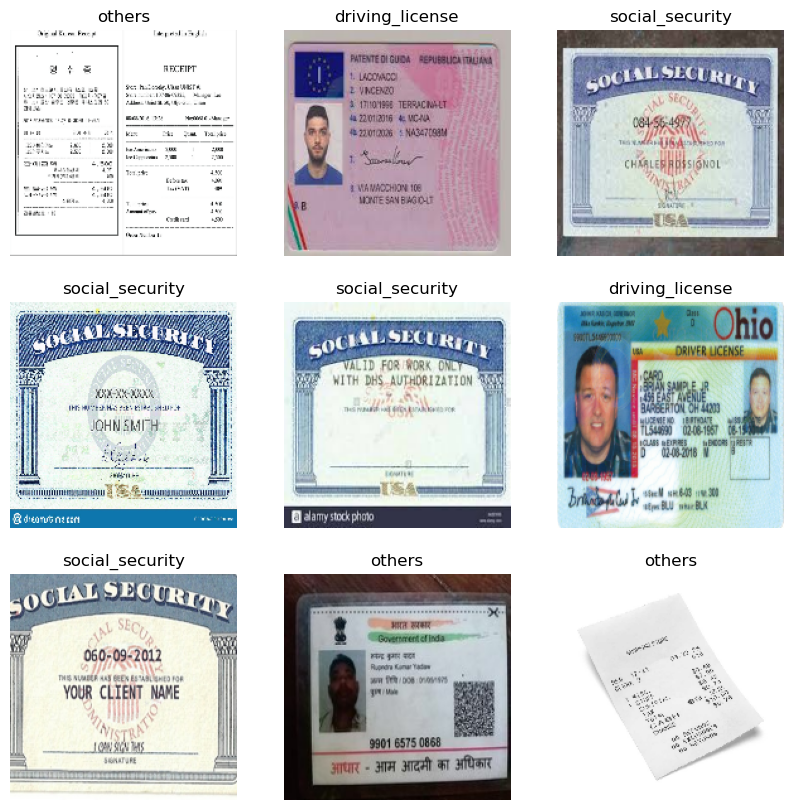

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [18]:
for image_batch, labels_batch in train_ds:
    print(image_batch.shape)  #(batch, image height & width, image categories)
    print(labels_batch.shape)
    break

(32, 180, 180, 3)
(32,)


In [19]:
AUTOTUNE = tf.data.AUTOTUNE 
# if  model is executing a step s, it'll fetch image for s+1
# caches images
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [21]:
normalization_layer = layers.Rescaling(1./255) #normalizing images

In [22]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0028424433 1.0


In [23]:
num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

E:\Anaconda\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)             ┃ Output Shape      ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ rescaling_2 (Rescaling)  │ (None, 180, 180,  │          0 │
│                          │ 3)                │            │
├──────────────────────────┼───────────────────┼────────────┤
│ conv2d (Conv2D)          │ (None, 180, 180,  │        448 │
│                          │ 16)               │            │
├──────────────────────────┼───────────────────┼────────────┤
│ max_pooling2d            │ (None, 90, 90,    │          0 │
│ (MaxPooling2D)           │ 16)               │            │
├──────────────────────────┼───────────────────┼────────────┤
│ conv2d_1 (Conv2D)        │ (None, 90, 90,    │      4,640 │
│                          │ 32)               │            │
├──────────────────────────┼───────────────────┼────────────┤
│ max_pooling2d_1          │ (None, 45, 45,    │          0 │
│ (MaxPooling2D)           │ 32)               │            │
├──────────────────────────┼───────────────────┼────────────┤
│ conv2d_2 (Conv2D)        │ (None, 45, 45,    │     18,496 │
│                          │ 64)               │            │
├──────────────────────────┼───────────────────┼────────────┤
│ max_pooling2d_2          │ (None, 22, 22,    │          0 │
│ (MaxPooling2D)           │ 64)               │            │
├──────────────────────────┼───────────────────┼────────────┤
│ flatten (Flatten)        │ (None, 30976)     │          0 │
├──────────────────────────┼───────────────────┼────────────┤
│ dense (Dense)            │ (None, 128)       │  3,965,056 │
├──────────────────────────┼───────────────────┼────────────┤
│ dense_1 (Dense)          │ (None, 3)         │        387 │
└──────────────────────────┴───────────────────┴────────────┘

 Total params: 3,989,027 (15.22 MB)

 Trainable params: 3,989,027 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.4269 - loss: 1.4345 - val_accuracy: 0.5667 - val_loss: 0.8999
Epoch 2/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.7363 - loss: 0.7119 - val_accuracy: 0.7917 - val_loss: 0.5169
Epoch 3/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.8920 - loss: 0.2967 - val_accuracy: 0.9000 - val_loss: 0.3072
Epoch 4/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.9116 - loss: 0.2219 - val_accuracy: 0.8833 - val_loss: 0.3458
Epoch 5/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.9608 - loss: 0.1386 - val_accuracy: 0.9167 - val_loss: 0.3935
Epoch 6/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.9738 - loss: 0.0993 - val_accuracy: 0.9167 - val_loss: 0.3940
Epoch 7/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.9845 - loss: 0.0565 - val_accuracy: 0.8833 - val_loss: 0.4962
Epoch 8/20
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.9963 - loss: 0.0344 - val_accuracy: 0.

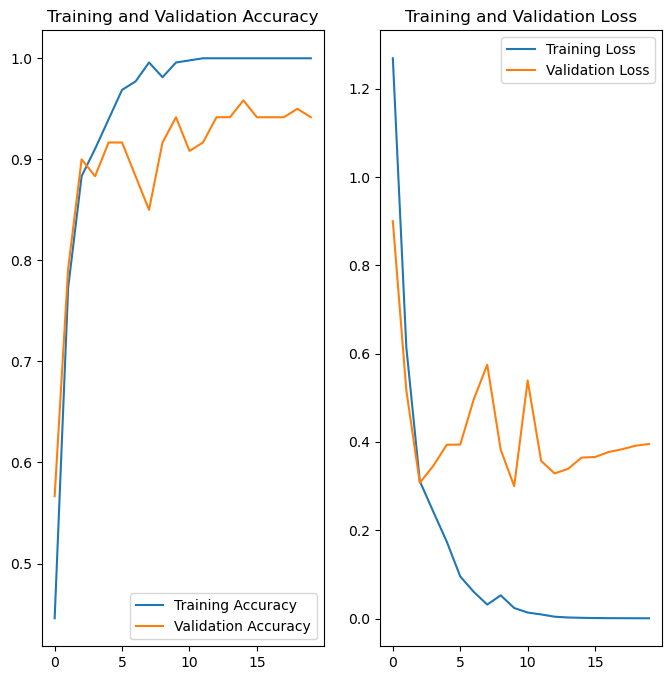

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Data Augmentation using Keras

In [28]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

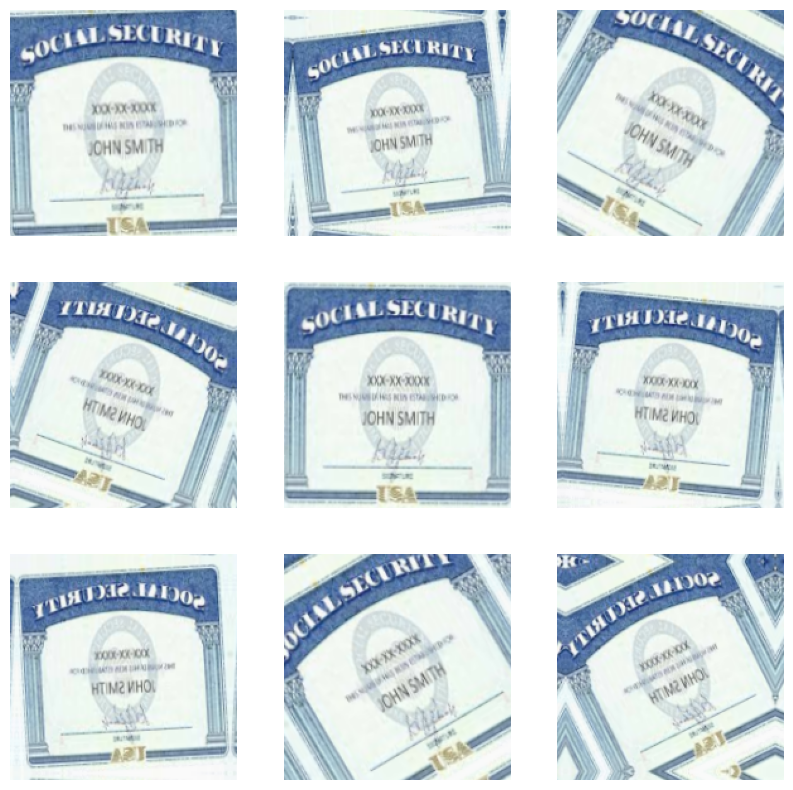

In [29]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

#### Implementing Dropout

In [30]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Layer (type)             ┃ Output Shape      ┃    Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━┩
│ sequential_1             │ (None, 180, 180,  │          0 │
│ (Sequential)             │ 3)                │            │
├──────────────────────────┼───────────────────┼────────────┤
│ rescaling_3 (Rescaling)  │ (None, 180, 180,  │          0 │
│                          │ 3)                │            │
├──────────────────────────┼───────────────────┼────────────┤
│ conv2d_3 (Conv2D)        │ (None, 180, 180,  │        448 │
│                          │ 16)               │            │
├──────────────────────────┼───────────────────┼────────────┤
│ max_pooling2d_3          │ (None, 90, 90,    │          0 │
│ (MaxPooling2D)           │ 16)               │            │
├──────────────────────────┼───────────────────┼────────────┤
│ conv2d_4 (Conv2D)        │ (None, 90, 90,    │      4,640 │
│                          │ 32)               │            │
├──────────────────────────┼───────────────────┼────────────┤
│ max_pooling2d_4          │ (None, 45, 45,    │          0 │
│ (MaxPooling2D)           │ 32)               │            │
├──────────────────────────┼───────────────────┼────────────┤
│ conv2d_5 (Conv2D)        │ (None, 45, 45,    │     18,496 │
│                          │ 64)               │            │
├──────────────────────────┼───────────────────┼────────────┤
│ max_pooling2d_5          │ (None, 22, 22,    │          0 │
│ (MaxPooling2D)           │ 64)               │            │
├──────────────────────────┼───────────────────┼────────────┤
│ dropout (Dropout)        │ (None, 22, 22,    │          0 │
│                          │ 64)               │            │
├──────────────────────────┼───────────────────┼────────────┤
│ flatten_1 (Flatten)      │ (None, 30976)     │          0 │
├──────────────────────────┼───────────────────┼────────────┤
│ dense_2 (Dense)          │ (None, 128)       │  3,965,056 │
├──────────────────────────┼───────────────────┼────────────┤
│ dense_3 (Dense)          │ (None, 3)         │        387 │
└──────────────────────────┴───────────────────┴────────────┘

 Total params: 3,989,027 (15.22 MB)

 Trainable params: 3,989,027 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - accuracy: 0.3018 - loss: 1.3684 - val_accuracy: 0.5000 - val_loss: 1.0586
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.5662 - loss: 1.0457 - val_accuracy: 0.3333 - val_loss: 1.3128
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 139ms/step - accuracy: 0.5543 - loss: 0.9786 - val_accuracy: 0.6500 - val_loss: 0.7781
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.7528 - loss: 0.6444 - val_accuracy: 0.6750 - val_loss: 0.9746
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step - accuracy: 0.7880 - loss: 0.5303 - val_accuracy: 0.6583 - val_loss: 0.8968
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.8268 - loss: 0.4749 - val_accuracy: 0.6583 - val_loss: 0.8766
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step - accuracy: 0.8514 - loss: 0.3784 - val_accuracy: 0.8083 - val_loss: 0.5571
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 148ms/step - accuracy: 0.8915 - loss: 0.3035 - val_accuracy: 0.

In [34]:
model.save("cnn-model.h5") #saving the model

In [37]:
model = tf.keras.models.load_model("cnn-model.h5")

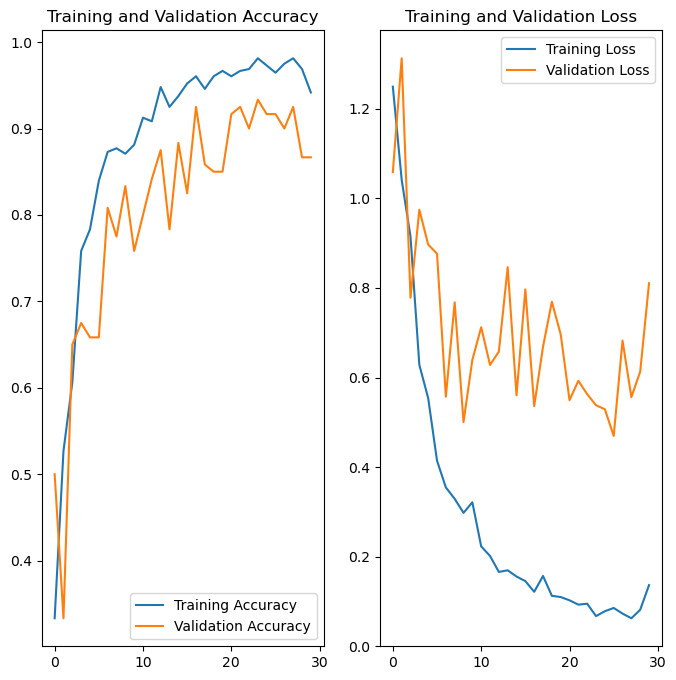

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#after 10 epochs loss was minimum validation loss increased after 10 epochs..
#therefore can train upto 10 epochs

## Prediction

In [39]:
test_data_dir = pathlib.Path("input/Testing_Data//")

In [40]:
image_count = len(list(test_data_dir.glob('*/*')))
print(image_count)

150


In [41]:
test_driving_license = list(test_data_dir.glob('driving_license/*'))
test_social_security = list(test_data_dir.glob('social_security/*'))
test_others = list(test_data_dir.glob('others/*'))

In [42]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 150 files belonging to 3 classes.


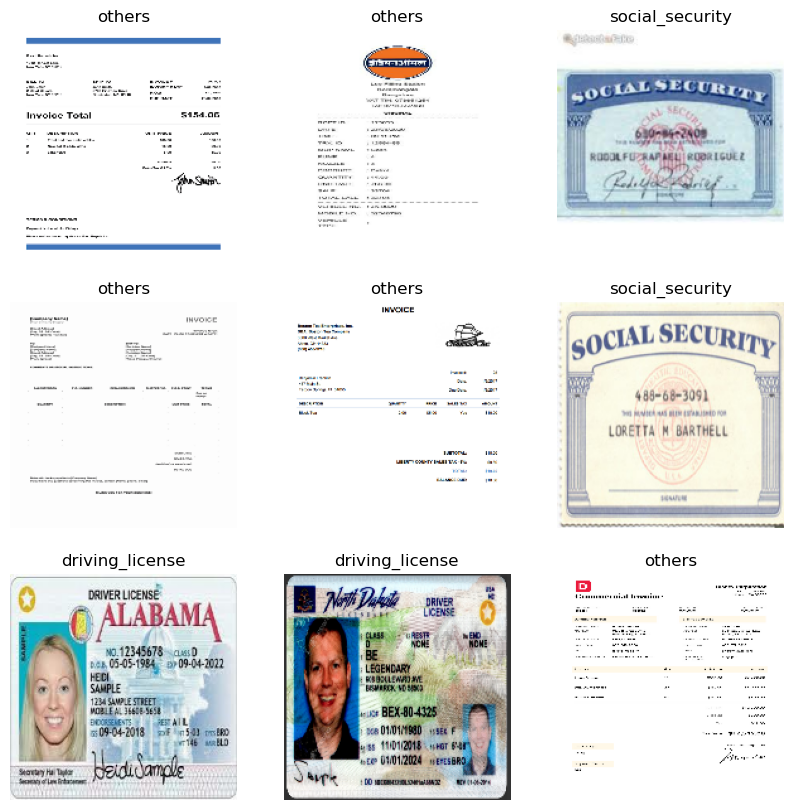

In [43]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [37]:
model.evaluate(test_ds)

5/5 [==============================] - 1s 66ms/step - loss: 1.0168 - accuracy: 0.3467


[1.0167529582977295, 0.3466666638851166]

In [44]:
img = tf.keras.utils.load_img(
    "input/Testing_Data/others/111.jpg", target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

In [45]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
This image most likely belongs to others with a 99.92 percent confidence.
